# Texto a vectores (Stemming)

**Descripción :**

Una vez que ya tenemos nuestros datos limpios, lo que procede es convertirlos a vectores para poder utilizarlos en nuestro modelo de aprendizaje. Utilizaremos word2vec para convertir nuestros textos a vectores y también haremos la matriz TF-IDF para poder comparar los resultados.

Word2Vec form Google : https://code.google.com/archive/p/word2vec/

**Resources:**
* https://medium.com/swlh/word-embedding-word2vec-with-genism-nltk-and-t-sne-visualization-43eae8ab3e2e
* https://radimrehurek.com/gensim/models/word2vec.html

**Team:**  
* Chaparro Sicardo Tanibeth  
* Malváez Flores Axel Daniel

In [1]:
# Librerías que necesitaremos para el procedimiento
import numpy as np
import pandas as pd
import re
from gensim.models import word2vec, Word2Vec, KeyedVectors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils import *

%matplotlib inline
pd.options.mode.chained_assignment = None

* Leemos los datos

In [2]:
data = pd.read_csv('../Data/clean_df.csv')
data

,Category,id,stemming_description
0,Household,1,"[paper, plane, design, frame, wall, hang, moti..."
1,Household,2,"[saf, floral, frame, paint, wood, inch, x, inc..."
2,Household,3,"[saf, uv, textur, modern, art, print, frame, p..."
3,Household,4,"[saf, flower, print, frame, paint, synthet, in..."
4,Household,5,"[incred, gift, india, wooden, happi, birthday,..."
...,...,...,...
50419,Electronics,50421,"[strontium, microsd, class, gb, memori, card, ..."
50420,Electronics,50422,"[crossbeat, wave, waterproof, bluetooth, wirel..."
50421,Electronics,50423,"[karbonn, titanium, wind, w, white, karbonn, t..."
50422,Electronics,50424,"[samsung, guru, fm, plu, smbed, black, colourb..."


In [3]:
le = LabelEncoder()
le.fit(data['Category'])

data['label'] = le.transform(data['Category'])

## Preprocessing data for Stemming

### Word2Vec

Word2vec es una colección de modelos relacionados que se utilizan para crear incrustaciones de palabras. Estos modelos son sistemas de redes neuronales superficiales de dos capas que están preparados para rehacer configuraciones etimológicas de palabras. Word2vec toma como información un enorme corpus de texto y produce un espacio vectorial, normalmente de unos pocos cientos de medidas, asignando a cada palabra extraordinaria del corpus un vector de comparación en el espacio.

Los vectores de palabras están situados en el espacio vectorial hasta tal punto que las palabras que comparten contexto particular en el corpus se encuentran cerca unas de otras en el espacio.

* Dado que nuestro data frame lee nuestros datos como un string, lo que procede es convertirlo a una lista de palabras para poder utilizar nuestras bolsas de palabras.

In [4]:
# Regex para eliminar los corchetes del string
regex = re.compile(r'[\[\]]')

# Aplicamos la regex a la columna 'stemming_description' y hacemos un split sobre la coma
data['stemming_description'] = data['stemming_description'].apply(lambda x: regex.sub('', x).split(', '))

# Creamos el corpus
corpus = data['stemming_description']
corpus = corpus.tolist()

**Entrenamos nuestro propio modelo para que procese nuestros datos y nos de los vectores de cada palabra.**

* Para conjuntos de datos pequeños o cuando es importante capturar palabras raras, Skip-Gram puede funcionar mejor.
* Para conjuntos de datos más grandes o cuando los recursos computacionales son limitados, CBOW puede ser más rápido de entrenar.
* A menudo se prefiere Skip-Gram para tareas que requieren capturar relaciones semánticas y analogías de palabras.
* CBOW puede funcionar bien para tareas donde el contexto general de las palabras es más crítico.

* Skip-Gram

In [5]:
model_sg = Word2Vec(corpus, window=20, min_count=2, workers=4, vector_size=300, sg=1)
model_sg.save('../Data/Word2Vec-Own/word2vecSG.model')

word_vectors_sg = model_sg.wv
word_vectors_sg.save('../Data/Word2Vec-Own/word2vecSG.wordvectors')

# If you’re finished training a model (i.e. no more updates, only querying), you can switch to the KeyedVectors instance:
del model_sg

* CBOW

In [6]:
model_cbow = Word2Vec(corpus, window=20, min_count=2, workers=4, vector_size=300, sg=0)
model_cbow.save('../Data/Word2Vec-Own/word2vecCBOW.model')

word_vectors_cbow = model_cbow.wv
word_vectors_cbow.save('../Data/Word2Vec-Own/word2vecCB.wordvectors')

# If you’re finished training a model (i.e. no more updates, only querying), you can switch to the KeyedVectors instance
del model_cbow

**KeyedVectors** 

La razón para separar los vectores entrenados en *KeyedVectors* es que si ya no necesitamos el estado completo del modelo (no necesita continuar entrenando), su estado puede descartarse, manteniendo solo los vectores y sus claves.

Esto da como resultado un objeto mucho más pequeño y más rápido que se puede mapear para una carga más rápida y compartir los vectores en la RAM entre procesos:

In [7]:
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load('../Data/Word2Vec-Own/word2vecSG.wordvectors', mmap='r')
vector = wv['paper']
vector

memmap([-1.95562363e-01,  2.29045913e-01,  3.25107813e-01,
        -4.79945913e-02, -6.66742846e-02, -5.11576474e-01,
        -1.46939933e-01,  5.44160455e-02, -1.05395377e-01,
         1.93734076e-02, -8.30906928e-02,  7.61772133e-03,
        -1.27045214e-01, -1.94946099e-02,  7.82813653e-02,
        -5.32886744e-01, -6.74326718e-01, -3.07476431e-01,
         1.95839152e-01,  2.37628184e-02,  2.10984468e-01,
         2.46700436e-01,  2.96073020e-01, -2.54398584e-01,
         3.65668461e-02,  1.24402910e-01,  6.60713464e-02,
         1.91148058e-01, -7.31350556e-02,  3.34321916e-01,
        -3.54683846e-01,  2.96703130e-01,  2.34645516e-01,
        -4.31085229e-01, -1.50954083e-01,  6.58055007e-01,
         3.48656513e-02, -2.24128991e-01, -3.77267092e-01,
         1.85914829e-01, -3.85111570e-01, -2.75070339e-01,
        -2.60854632e-01,  4.22337353e-01, -2.97474682e-01,
         3.57151538e-01, -2.03890413e-01, -2.86115110e-01,
        -2.11623430e-01,  3.65768313e-01, -1.89109594e-0

In [8]:
# Supongamos que tienes dos palabras de ejemplo
palabra1 = 'cat'
palabra2 = 'dog'

# Obtiene los vectores de palabras para ambas palabras
vector1 = wv[palabra1]
vector2 = wv[palabra2]

# Calcula la similitud de coseno entre los dos vectores
similitud_coseno = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

print(f"Similitud de coseno entre '{palabra1}' y '{palabra2}': {similitud_coseno:.2f}")

Similitud de coseno entre 'cat' y 'dog': 0.38


* Función para sumar los vectores de cada palabra en cada documento

In [9]:
# Generate document vectors for each document in your corpus
size = wv.vector_size
document_vectors = np.array([document_vectorizer(doc_token, wv, vector_size=size) for doc_token in corpus])

In [10]:
print('Dimensión de nuestra matriz de documentos (ya vectorizados):', document_vectors.shape)

Dimensión de nuestra matriz de documentos (ya vectorizados): (50424, 300)


* Visualizamos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


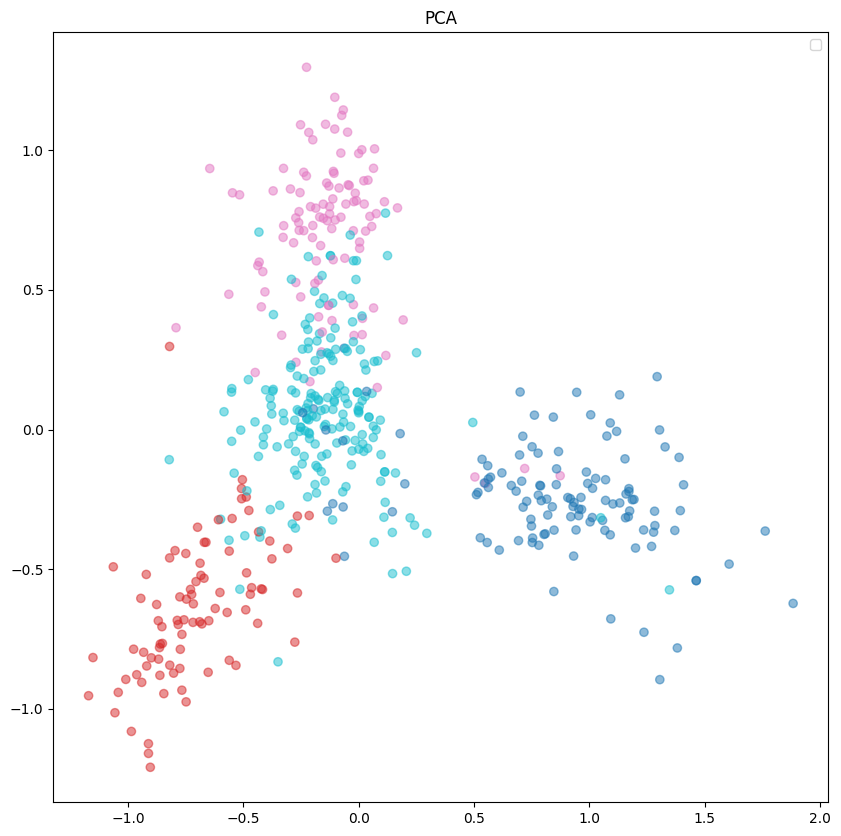

In [11]:
# Agarramos una muestra para visualizar
X_sample, _, y_sample, _ = train_test_split(document_vectors, data['label'], test_size=0.99, random_state=42, stratify=data['label'])

# Reducimos la dimensionalidad a 2 para poder visualizar
pca = PCA(n_components=2)
pca.fit(X_sample)
X_pca = pca.transform(X_sample)

# Graficamos
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.5)
plt.title('PCA')
plt.legend()
plt.show()

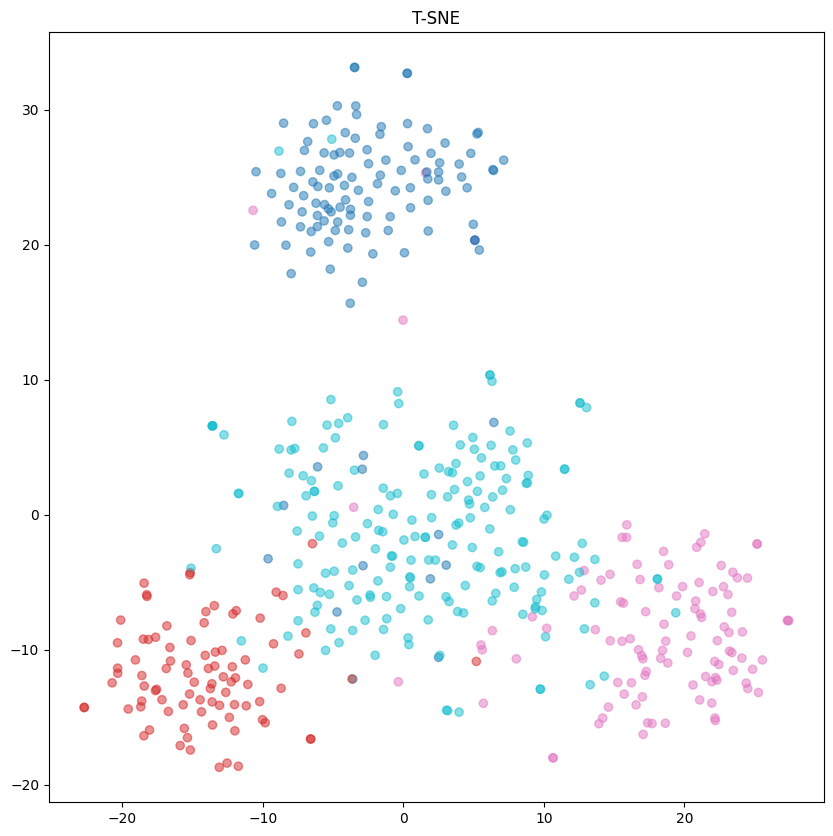

In [12]:
# Create the model and fit it
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(X_sample)

# Create the figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

# Create the scatter
ax.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5, c=y_sample, cmap='tab10')
plt.title('T-SNE')

# Show the plot
plt.show()

### TF-IDF matrix

In [13]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# docs = []

# for doc in data['stemming_description']:
#     doc_join = ' '.join(doc)
#     docs.append(doc_join)

# # Crear un objeto TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()

# tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
# tfidf_matrix_array = tfidf_matrix.toarray()

# features = tfidf_vectorizer.get_feature_names_out()

# print('Matriz TF-IDF:')
# print(tfidf_matrix_array)

# print('')
# print('Características (Términos):')
# print(features)

In [14]:
# tfidf_matrix_array.shape

### Google word2vec

In [15]:
# Load the pre-trained Word2Vec model
model_google = KeyedVectors.load_word2vec_format('../Data/Word2Vec-Google/GoogleNews-vectors-negative300.bin', binary=True)
vectors = model_google.vectors

In [16]:
# Supongamos que tienes dos palabras de ejemplo
palabra1 = 'cat'
palabra2 = 'dog'

# Obtiene los vectores de palabras para ambas palabras
vector1 = model_google[palabra1]
vector2 = model_google[palabra2]

# Calcula la similitud de coseno entre los dos vectores
similitud_coseno = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

print(f"Similitud de coseno entre '{palabra1}' y '{palabra2}': {similitud_coseno:.2f}")

Similitud de coseno entre 'cat' y 'dog': 0.76


In [17]:
print('Dimensión de la matriz de vectores de Google:', vectors.shape)

Dimensión de la matriz de vectores de Google: (3000000, 300)


In [20]:
document_vectors_google = np.array([document_vectorizer(doc_token, model_google) for doc_token in corpus])
print('Dimensión de nuestra matriz de documentos (ya vectorizados con Google):', document_vectors_google.shape)

Dimensión de nuestra matriz de documentos (ya vectorizados con Google): (50424, 300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


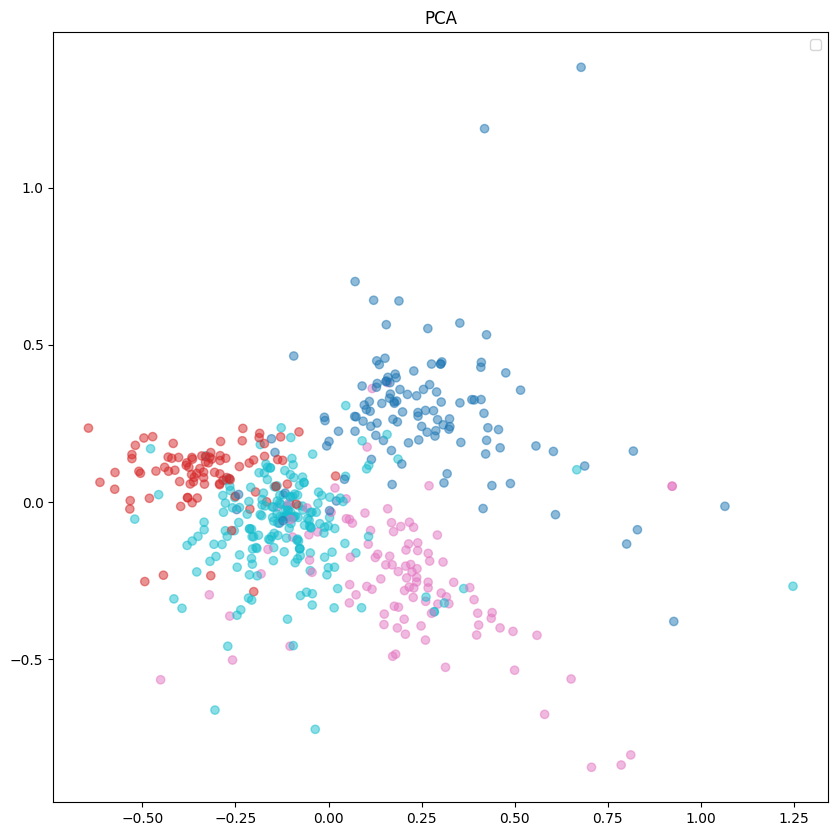

In [21]:
# Agarramos una muestra para visualizar
X_sample, _, y_sample, _ = train_test_split(document_vectors_google, data['label'], test_size=0.99, random_state=42, stratify=data['label'])

# Reducimos la dimensionalidad a 2 para poder visualizar
pca = PCA(n_components=2)
pca.fit(X_sample)
X_pca = pca.transform(X_sample)

# Graficamos
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.5)
plt.title('PCA')
plt.legend()
plt.show()

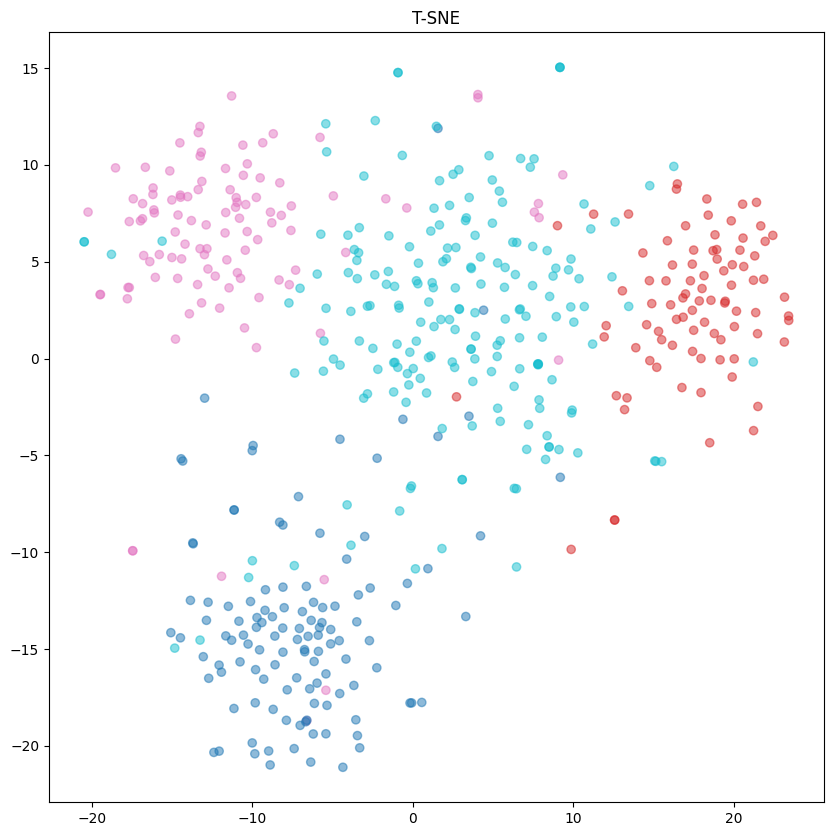

In [22]:
# Create the model and fit it
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(X_sample)

# Create the figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

# Create the scatter
ax.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5, c=y_sample, cmap='tab10')
plt.title('T-SNE')

# Show the plot
plt.show()

## Classification

Loading...